In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
orientation_estimates = pd.read_csv('orientation_estimated.csv')
orientation_measures = pd.read_csv('orientation_measured.csv')
pos_estimated = pd.read_csv('pos_estimated.csv')
pos_measured = pd.read_csv('pos_measured.csv')
wheel_speeds_predicted = pd.read_csv('wheel_speeds_predicted.csv')
wheel_speeds_commanded = pd.read_csv('wheel_speeds_commanded.csv')
wheel_speeds_measured = pd.read_csv('wheel_speeds_measured.csv')


Text(0.5, 1.0, 'Right Wheel speeds')

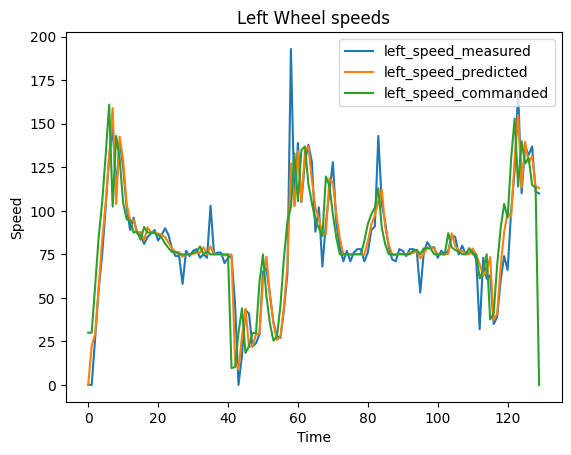

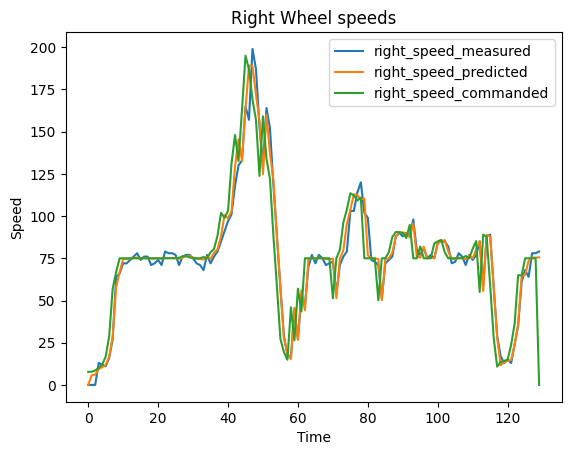

In [27]:
#Plot wheel speeds

fig, ax = plt.subplots()
fig2, ax2 = plt.subplots()
ax.plot(wheel_speeds_measured['left_speed_measured'], label='left_speed_measured')
ax2.plot(wheel_speeds_measured['right_speed_measured'], label='right_speed_measured')
ax.plot(wheel_speeds_predicted['left_speed_predicted'], label='left_speed_predicted')
ax2.plot(wheel_speeds_predicted['right_speed_predicted'], label='right_speed_predicted')
ax.plot(wheel_speeds_commanded['left_speed_commanded'], label='left_speed_commanded')
ax2.plot(wheel_speeds_commanded['right_speed_commanded'], label='right_speed_commanded')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Speed [Thymio Units]')
ax2.set_xlabel('Time[s]')
ax2.set_ylabel('Speed [Thymio Units]')

ax.legend()
ax.set_title('Left Wheel speeds')
ax2.legend()
ax2.set_title('Right Wheel speeds')


Text(0.5, 1.0, 'Position')

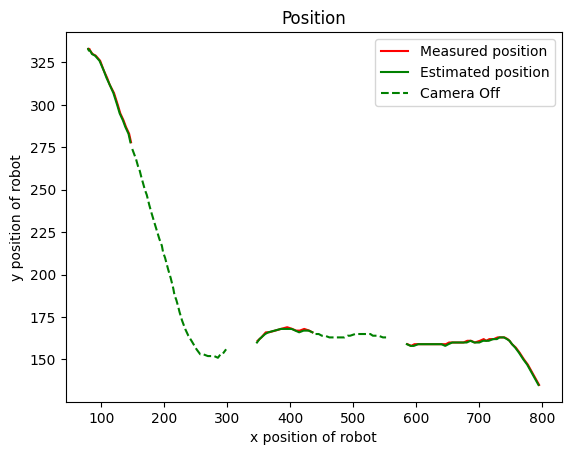

In [24]:
#Plot position

fig3, ax3 = plt.subplots()
df_measured_camera_on = pos_measured.copy()
df_measured_camera_off = pos_measured.copy()
df_estimated_camera_on = pos_estimated.copy()
df_estimated_camera_off = pos_estimated.copy()
df_measured_camera_on[df_measured_camera_on['camera_state'] == 'off' ] = np.nan
df_measured_camera_off[df_measured_camera_off['camera_state'] == 'on' ] = np.nan
df_estimated_camera_on[df_estimated_camera_on['camera_state'] == 'off' ] = np.nan



ax3.plot(df_measured_camera_on['x'], df_measured_camera_on['y'], label='Measured position', linestyle='solid', color='red')
ax3.plot(df_estimated_camera_on['x'], df_estimated_camera_on['y'], label='Estimated position', linestyle='solid', color='green')
ax3.plot(df_measured_camera_off['x'], df_measured_camera_off['y'], linestyle='dashed', color='green', label='Camera Off')

ax3.set_xlabel('x position of robot')
ax3.set_ylabel('y position of robot')

ax3.legend()
ax3.set_title('Position')

Text(0.5, 1.0, 'Orientation')

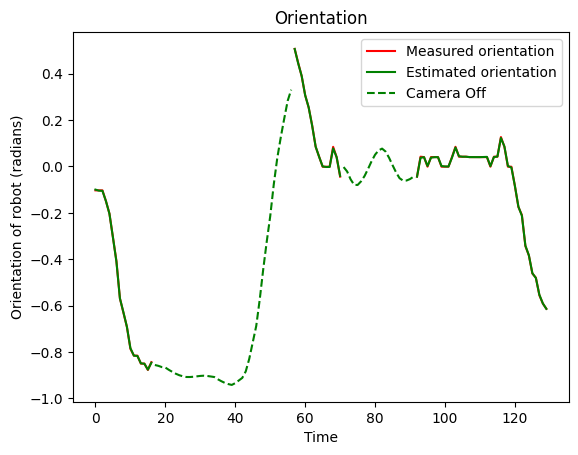

In [26]:
#Orientation

fig4, ax4 = plt.subplots()

def conv_to_pi(theta):
    if theta > np.pi:
        theta = theta - 2*np.pi
    return theta

orientation_measures['theta'] = orientation_measures['theta'].apply(conv_to_pi)
orientation_estimates['theta'] = orientation_estimates['theta'].apply(conv_to_pi)

orientation_measured_camera_on = orientation_measures.copy()
orientation_measured_camera_off = orientation_measures.copy()
orientation_estimated_camera_on = orientation_estimates.copy()
orientation_estimated_camera_off = orientation_estimates.copy()

orientation_measured_camera_on[orientation_measured_camera_on['camera_state'] == 'off' ] = np.nan
orientation_measured_camera_off[orientation_measured_camera_off['camera_state'] == 'on' ] = np.nan
orientation_estimated_camera_on[orientation_estimated_camera_on['camera_state'] == 'off' ] = np.nan

ax4.plot(orientation_measured_camera_on['theta'], label='Measured orientation', linestyle='solid', color='red')
ax4.plot(orientation_estimated_camera_on['theta'], label='Estimated orientation', linestyle='solid', color='green')
ax4.plot(orientation_measured_camera_off['theta'], linestyle='dashed', color='green', label='Camera Off')

ax4.set_xlabel('Time')
ax4.set_ylabel('Orientation of robot (radians)')

ax4.legend()
ax4.set_title('Orientation')
